Introduction
================
https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

**Simple regression**

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

y=mx+b

**Multivariable regression**

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

f(x,y,z)=w1x+w2y+w3z


Given our simple linear equation y=mx+b, we can calculate MSE as:

$ MSE = \frac{1}{N}\sum_{i=1}^{n}(y_{i}-(mx_{i}+b))^{2} $

We then aim to minismise this by varying the weights of the model such that the MSE is reduced, moving upwards the gradient of the cost function.

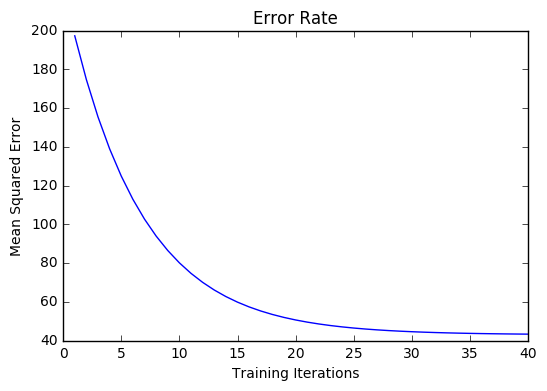


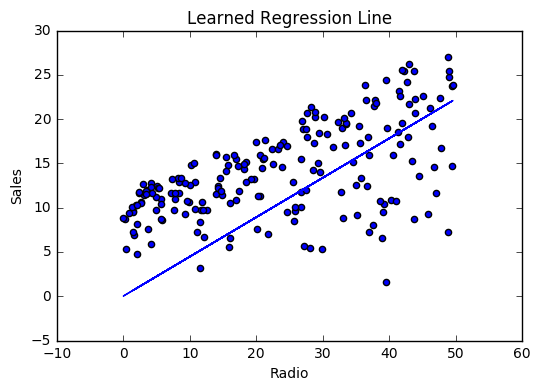

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import preprocessing_ml as pp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" # "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

#This is required to accept any changes to the module by forcing notebook to re-read the file 
#if any changes are made to the module while notebook is running
%load_ext autoreload
%autoreload 2


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
dataset = pd.read_csv('framingham.csv')
dataset.head()
dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Logistic Regression + K-neighbours
-----------------

In [340]:
def log_regressor(X_train, X_test, y_train, y_test, v =0):
    '''Do linear regression fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    from sklearn.linear_model import LogisticRegression
    
    logreg = LogisticRegression(random_state=0)
    logreg = logreg.fit(X_train, y_train) 
    
    if v == 1:
        print('Calculating logistic regressor......')
    
    return logreg
    


In [353]:

def k_neighbors(X_train, X_test, y_train, y_test, v=0,  n_neighbors= 16):
    '''Do k_neighbors  fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    - n_neighbors = 16: define number of neighbors 
    '''
    from sklearn.neighbors import KNeighborsClassifier
    
    
    KN = KNeighborsClassifier(n_neighbors)
    KN.fit(X_train, y_train) 
    
    if v == 1:
        print('Calculating k-neighbours......')
        
    return KN
    

Measures of success
---------------

In [477]:
def cross_val(model, X, Y, scoring = ['accuracy','precision','recall','f1'], cv=5):
    
   #See https://scikit-learn.org/stable/modules/model_evaluation.html for list of allowed scoring params 
    from sklearn.model_selection import cross_val_score 
    
    print('\nCrossvalidation score for {} splits:\n'.format(cv))   
    
    cv_results = pd.DataFrame(columns=scoring)
    for measure in scoring:
        cv_results[measure] = cross_val_score(model, X, Y, scoring = measure, cv=cv)
    
    #print("Cross validation Accuracy:\n", cv_results.mean(),"\nCross validation STDEV:\n" , cv_results.std())
    return cv_results.mean()

def performance(model,X_test,y_test,cutoff=0.5,v=0,output='Accuracy'):
    from sklearn.preprocessing import binarize
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
    from pandas import DataFrame
    
    y_pred = model.predict_proba(X_test)
    y_pred = binarize(y_pred,cutoff)[:,1]
    
    if v == 1: 
        
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
        print('f1 score: {:.2f}%'.format(f1_score(y_test,y_pred)*100))
        print('precision score: {:.2f}%'.format(precision_score(y_test,y_pred)*100))
        print('recall score: {:.2f}%'.format(recall_score(y_test,y_pred)*100))
        
        print(classification_report(y_test,y_pred))
    
    if output == 'Accuracy':
         return accuracy_score(y_test,y_pred)
    elif output == 'Precision':
         return precision_score(y_test,y_pred)
    elif output == 'Recall':
         return recall_score(y_test,y_pred)
    elif output == 'f1_score':
         return f1_score(y_test,y_pred)
    elif output == 'All':
        a = DataFrame({"Accuracy":[accuracy_score(y_test,y_pred)],
                         "Precision":[precision_score(y_test,y_pred)],
                         "Recall":[recall_score(y_test,y_pred)],
                         "f1_score":[f1_score(y_test,y_pred)]
                         })
        return a
    
    
measure = cross_val(logregs, X_train, y_train,scoring=['accuracy'])

measure
#where model_name is replaced by whatever you have defined the model fit as 
#For example in the K-neighbors section I have defined the model_name as KN. (see k_neighbors function)


Crossvalidation score for 5 splits:



accuracy    0.844525
dtype: float64

Optimising
---------------

LR accuracy max=0.8801
KN accuracy max=0.8678

LR summary:
Accuracy max=0.8801
Precision max=0.7857
Recall max=0.1146
f1_score max=0.2000


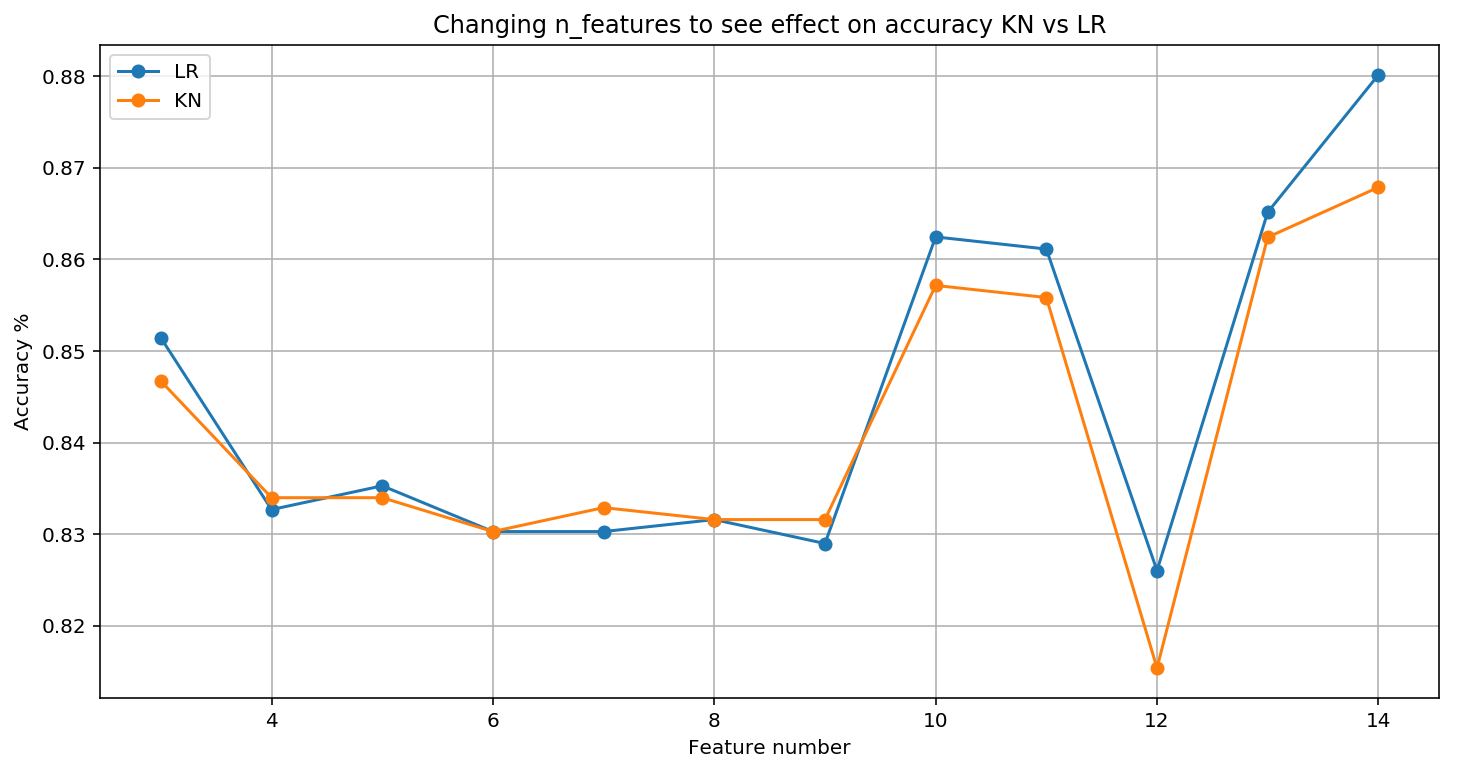

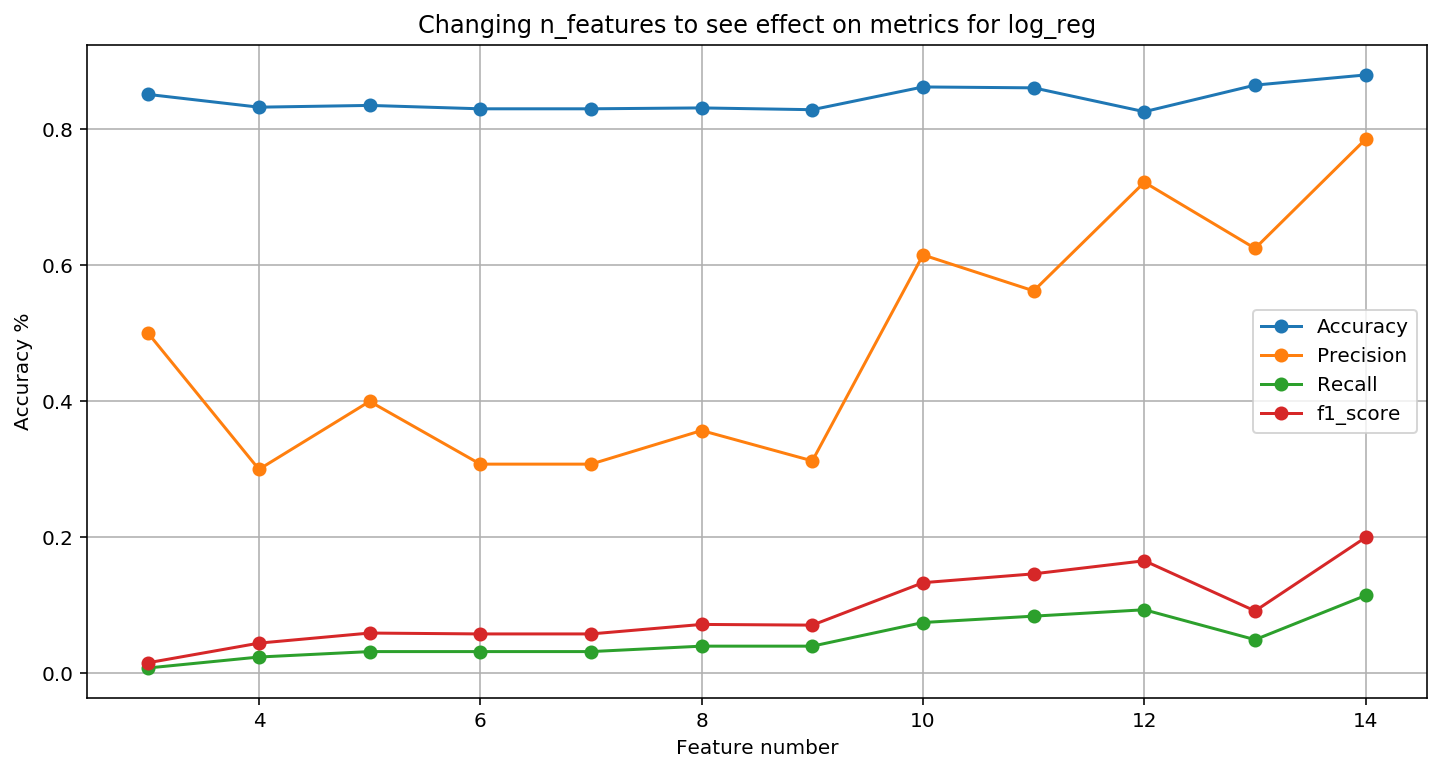

In [480]:
# Finally use all the functions I made to investigate preprocessing of dataset:
results = []
results_logreg = pd.DataFrame()

# features = ['TenYearCHD','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
#             'diabetes', 'BPMeds','male', 'BMI', 'prevalentStroke',
#             'education', 'heartRate', 'currentSmoker'] # for reference

features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']

from statsmodels.tools import add_constant as add_constant
dataset_c = add_constant(dataset)

for i in range(3,len(features)+1):
    #print(features[:i])
    dataset_t = pp.chose_features(dataset_c, features=features[:i]) # choose n features

    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    
    dataset_t = pp.scale_data(dataset_t)
    
    
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    logreg = log_regressor(X_train, X_test, y_train, y_test)
    KN = k_neighbors(X_train, X_test, y_train, y_test)
    
#     print(performance(logreg,X_test,y_test,output= 'Accuracy'))
    results.append([performance(logreg,X_test,y_test,output= 'Accuracy'),performance(KN,X_test,y_test,output= 'Accuracy')])
    
    results_logreg = results_logreg.append(performance(logreg,X_test,y_test,output= 'All'))

    
results = pd.DataFrame(results,columns=['LR','KN'])
# print(results_logreg)

plt.figure(figsize=(12, 6))
for algor in results.columns:
    plt.plot(range(3,i+1), results[algor],label=algor,marker='o')
    print(algor, "accuracy max={:.4f}".format(max(results[algor])))

plt.grid()
plt.title('Changing n_features to see effect on accuracy KN vs LR')
plt.xlabel('Feature number')
plt.ylabel('Accuracy %')
plt.legend()

plt.figure(figsize=(12, 6))
print('\nLR summary:')
for metric in results_logreg.columns:
    plt.plot(range(3,i+1), results_logreg[metric],label=metric,marker='o')
    print(metric, "max={:.4f}".format(max(results_logreg[metric])))
plt.grid()
plt.title('Changing n_features to see effect on metrics for log_reg')
plt.xlabel('Feature number')
plt.ylabel('Accuracy %')
plt.legend()




LR max= 88.14713896457765
KN max= 86.92098092643052
Best algorithm is:  LR
Accuracy max= 0.8814713896457765
Precision max= 0.8
Recall max= 0.96875
f1_score max= 0.36305732484076436


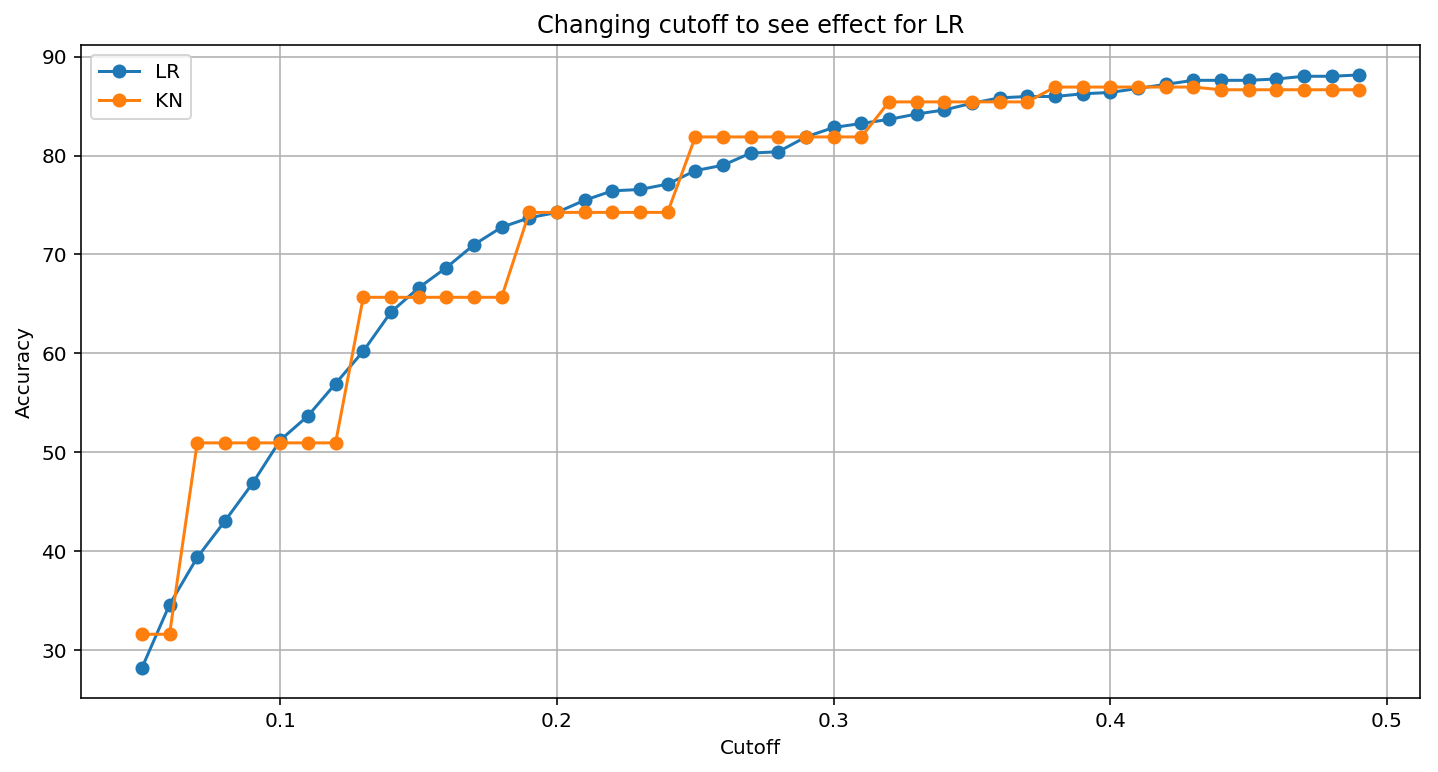

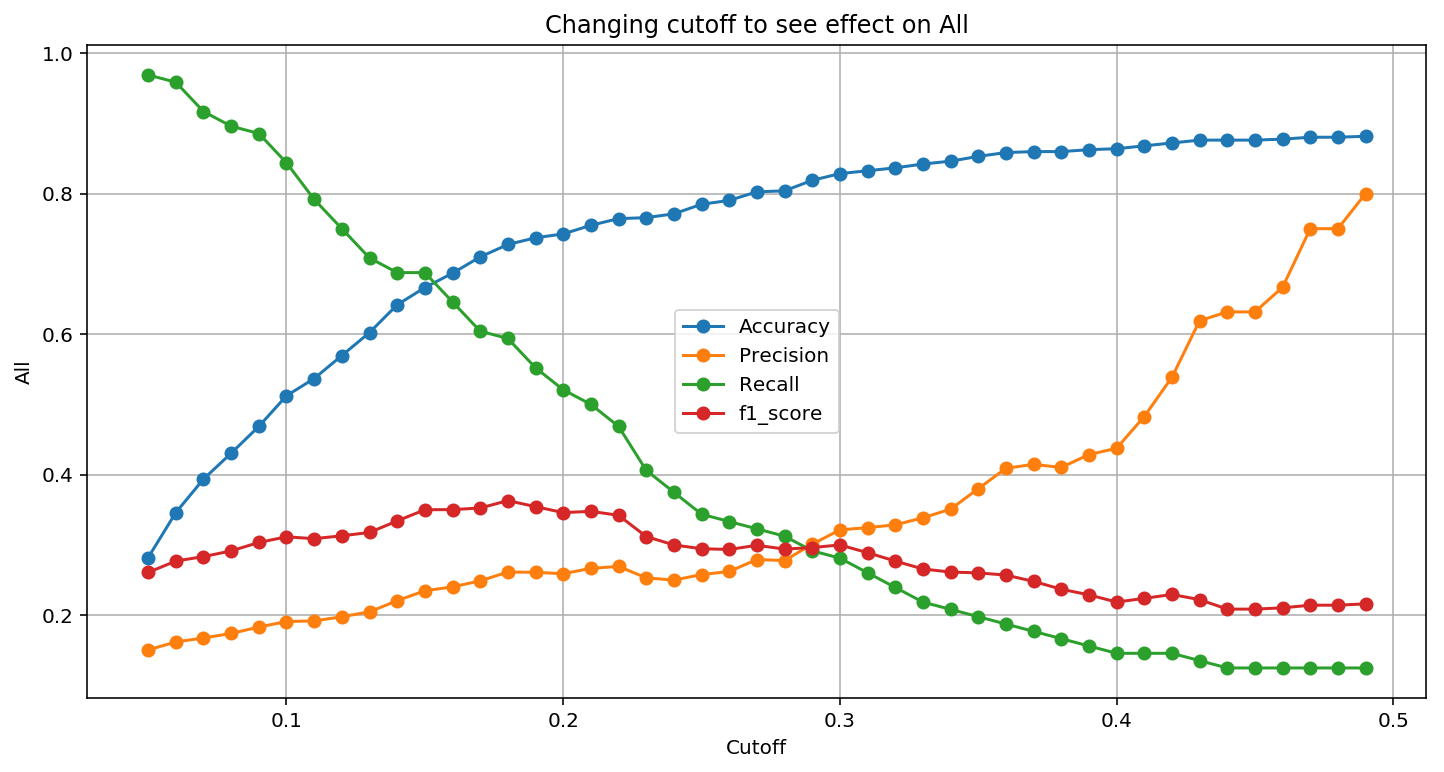

In [508]:
results = []

features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']

dataset_t = pp.chose_features(dataset_c, features=features) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows 
dataset_t = pp.scale_data(dataset_t)
      
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
logreg = log_regressor(X_train, X_test, y_train, y_test)
KN = k_neighbors(X_train, X_test, y_train, y_test)
    
range_x = np.arange(0.05, 0.5, 0.01)
param = 'Accuracy'
for cutoff in range_x:
    results.append([performance(logreg,X_test,y_test,cutoff=cutoff,output=param)
                    ,performance(KN,X_test,y_test,cutoff=cutoff,output=param)])

results=pd.DataFrame(results,columns=('LR','KN'))*100
#print(results)

plt.figure(figsize=(12, 6))
for al in results.columns:
    plt.plot(range_x, results[al],label=al,marker='o')
    print(al, "max=", max(results[al]))
plt.grid()
plt.title('Changing cutoff to see effect for LR')
plt.xlabel('Cutoff')
plt.ylabel(param)
plt.legend()

print('Best algorithm is: ',max(results))

results = pd.DataFrame()
range_x = np.arange(0.05, 0.5, 0.01)
param = 'All'
for cutoff in range_x:
    results = results.append(performance(logreg,X_test,y_test,cutoff=cutoff,output=param))


#print(results)

plt.figure(figsize=(12, 6))
for al in results.columns:
    plt.plot(range_x, results[al],label=al,marker='o')
    print(al, "max=", max(results[al]))
plt.grid()
plt.title('Changing cutoff to see effect on {}'.format(param))
plt.xlabel('Cutoff')
plt.ylabel(param)
plt.legend()

0.7225215517241379

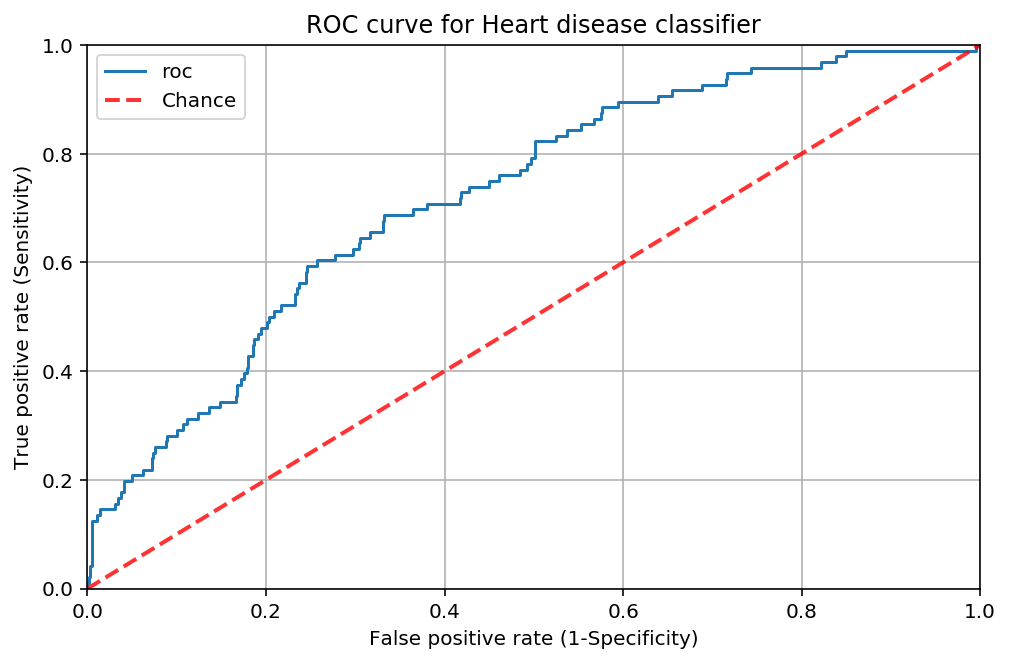

In [512]:
from sklearn.metrics import roc_curve
y_pred_prob_yes=logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label ='roc')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.legend()

sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])


Calculating linear regressor...

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix:
[[604   5]
 [113  10]]
Accuracy: 83.88%
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       609
           1       0.67      0.08      0.14       123

   micro avg       0.84      0.84      0.84       732
   macro avg       0.75      0.54      0.53       732
weighted avg       0.81      0.84      0.78       732



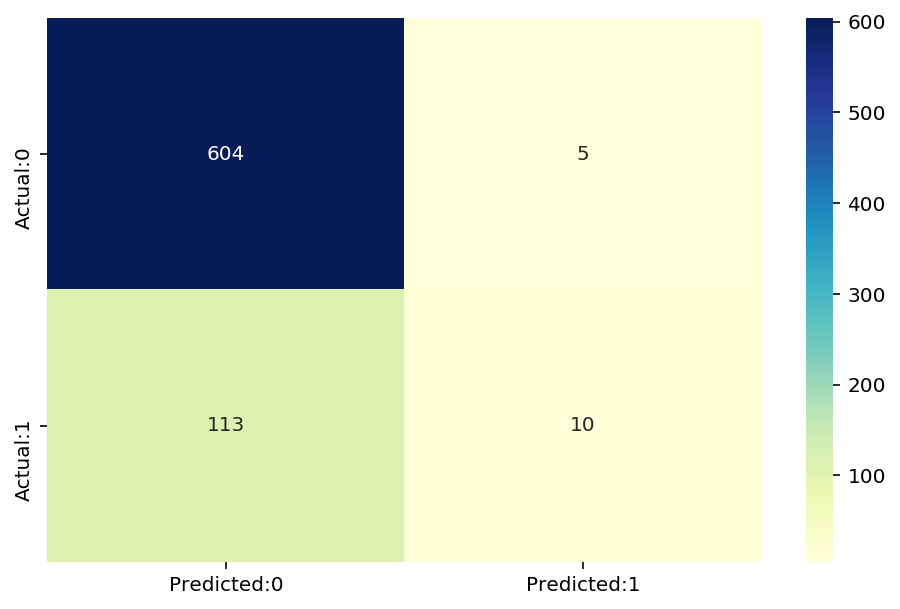

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('\nCalculating linear regressor...\n')
logreg = LogisticRegression(random_state=0)
logreg = logreg.fit(X_train, y_train)
print(logreg)

y_pred = logreg.predict(X_test)

print('Confusion Matrix:')
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
print(confusion_matrix(y_test,y_pred))

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test,y_pred))



In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('True Positives: {}, True Negatives: {}, False Positives (Type 1 error): {}, False Negatives (Type 2 error): {}\n'
     .format(TP,TN,FP,FN))
    
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


#From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.


In [193]:
from statsmodels.tools import add_constant as add_constant
dataset2 = add_constant(dataset)
dataset2.head()
dataset2 = pp.drop_missing(dataset2)

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train) 
cols=dataset2.columns[:-1]
model=sm.Logit(dataset2.TenYearCHD,dataset2[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Mon, 04 Nov 2019   Pseudo R-squ.:                  0.1175
Time:                        01:05:29   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
                                        LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
male                0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [194]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(dataset2,dataset2.TenYearCHD,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Nov 2019   Pseudo R-squ.:                  0.1148
Time:                        01:05:31   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
                                        LLR p-value:                 2.408e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1353      0.475    -19.213      0.000     -10.067      -8.203
male           0.5617      0.107      5.258      0.000       0.352       0.771
age            0.0660      0.006     10.267      0.000       0.053       0.079
cigsPerDay     0.0192      0.004      4.606      0.000       0.011       0.027
totChol        0.0023      0.001      2.031      0.042    8.01e-05       0.004
sysBP          0.0175      0.002      8.155      0.000       0.013       0.022
glucose        0.0073      0.002      4.343      0.000       0.004       0.011
==============================================================================
"""

In [195]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000042       0.000274    0.000108   0.000
male            1.422325       2.161998    1.753586   0.000
age             1.054823       1.081727    1.068190   0.000
cigsPerDay      1.011106       1.027788    1.019413   0.000
totChol         1.000080       1.004491    1.002283   0.042
sysBP           1.013404       1.021977    1.017682   0.000
glucose         1.004004       1.010626    1.007310   0.000


Now dropping rows with missing values....
	 * Dropped 582 rows 13.7%. 3658 rows remaining

With 0.1 threshold the Confusion Matrix is  
 [[272 337]
 [ 12 111]] 
 with 383 correct predictions and 12 Type II errors( False Negatives) 
 Sensitivity:  0.9024390243902439 Specificity:  0.4466338259441708 

With 0.2 threshold the Confusion Matrix is  
 [[487 122]
 [ 49  74]] 
 with 561 correct predictions and 49 Type II errors( False Negatives) 
 Sensitivity:  0.6016260162601627 Specificity:  0.7996715927750411 

With 0.3 threshold the Confusion Matrix is  
 [[566  43]
 [ 88  35]] 
 with 601 correct predictions and 88 Type II errors( False Negatives) 
 Sensitivity:  0.2845528455284553 Specificity:  0.9293924466338259 

With 0.4 threshold the Confusion Matrix is  
 [[595  14]
 [103  20]] 
 with 615 correct predictions and 103 Type II errors( False Negatives) 
 Sensitivity:  0.16260162601626016 Specificity:  0.9770114942528736 



0.7815424459663315

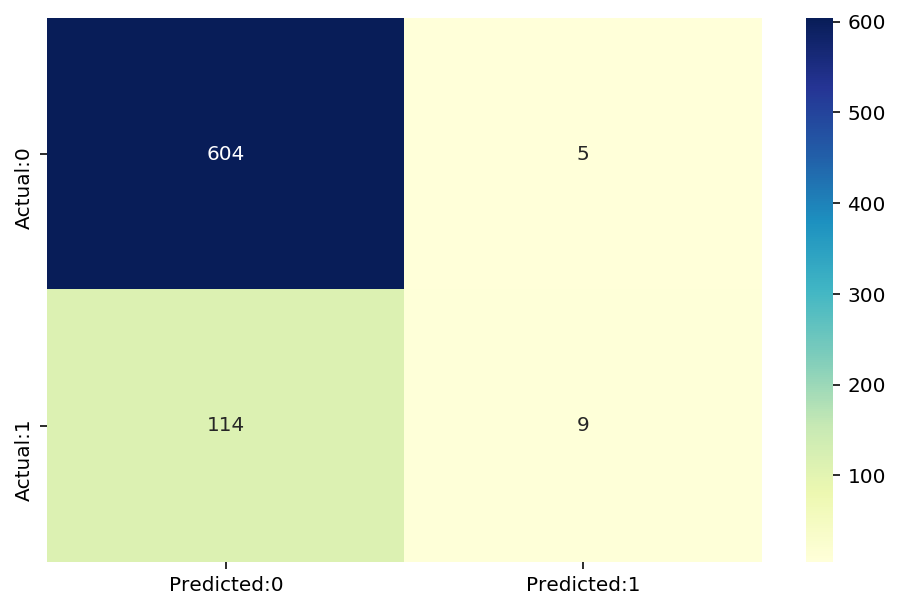

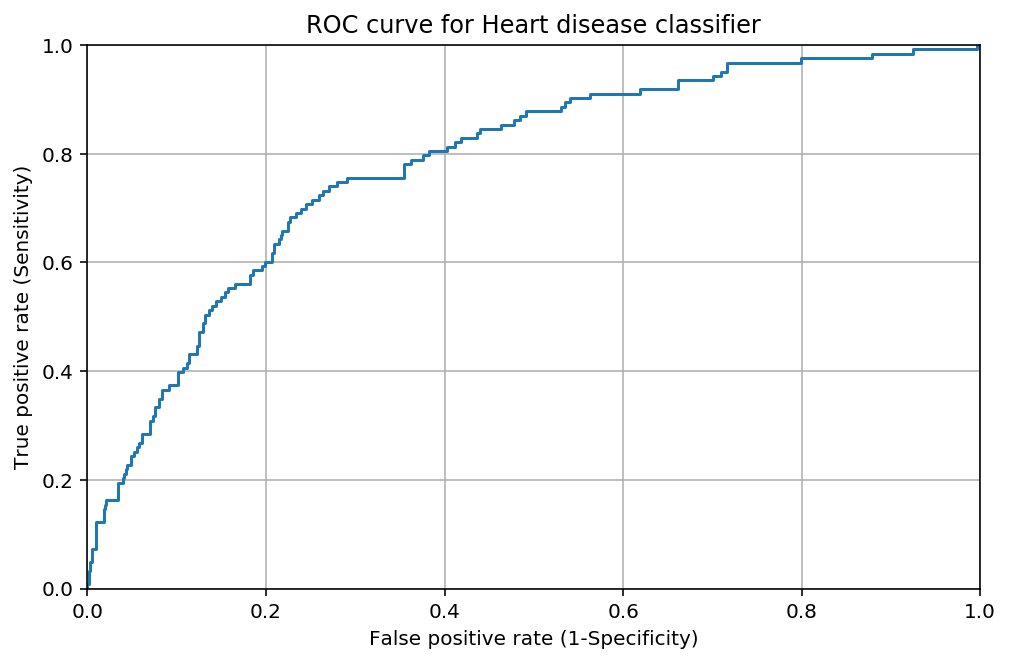

In [199]:
# dataset2=pp.chose_features(dataset,features=['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD'])
# dataset2=pp.drop_missing(dataset2)
# X_train,X_test,y_train,y_test=pp.split_data(dataset2)

# log_regressor(X_train, X_test, y_train, y_test)
import sklearn
new_features=dataset[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
new_features=pp.drop_missing(dataset,v=1)
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

x_train,x_test,y_train,y_test=pp.split_data(new_features,test_size=.20)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

sklearn.metrics.accuracy_score(y_test,y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n')
    


The following is implemented above

In [3]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
if count>0:
    print(count, 'Rows(or', round((count/len(dataset.index))*100), '%) with missing values are dropped out of total', str(len(dataset.index)))
    dataset.dropna(axis=0,inplace=True)
    print('Now dataset has', len(dataset.index),' rows')

582 Rows(or 14 %) with missing values are dropped out of total 4240
Now dataset has 3658  rows


In [14]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[604   5]
 [112  11]]


In [18]:
from sklearn.metrics import accuracy_score as score
print('Accuracy:')
print(score(y_test,y_pred)*100)

Accuracy:
84.01639344262296
